In [7]:
from dash import dcc, html, Input, Output, Dash
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

In [8]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

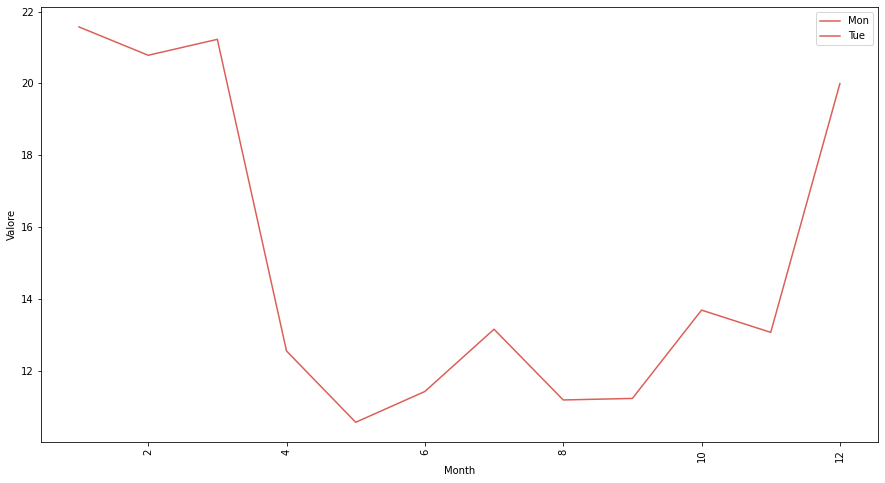

In [9]:
#with specific station, pollutant and year

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
#example for the input value below: 
df_year_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
df_year_avg = df_year_avg.groupby(pd.PeriodIndex(df_year_avg['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year", palette="hls", data=df_year_avg)
plt.legend(labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
xticks(rotation = 90)


     Year  Month     Valore
0    2012      1  31.359650
1    2012      2  35.384362
2    2012      3  32.708612
3    2012      4  25.925557
4    2012      5  28.295275
..    ...    ...        ...
122  2022      3  35.355791
123  2022      4  27.224740
124  2022      5  27.324037
125  2022      6  30.083651
126  2022      7  30.989408

[127 rows x 3 columns]


([<matplotlib.axis.XTick at 0x7fb286a9f640>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

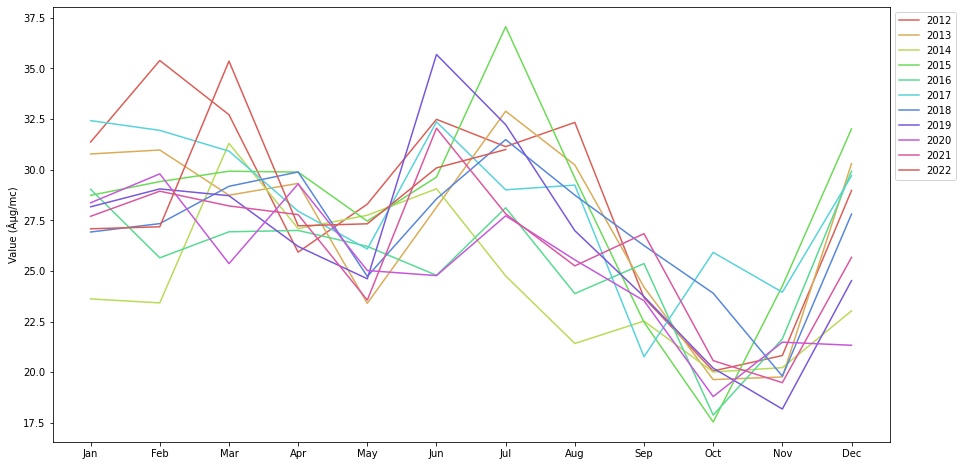

In [10]:
#with all stations, pollutants and years
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year", palette= "hls", data=df_year_avg)
plt.ylabel('Value (Âµg/mc)')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1,1), labels=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


Checklist(options=array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]))

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 